In [1]:
# importing necessary libraries 

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/australia-weather-data/Weather Training Data.csv
/kaggle/input/australia-weather-data/Weather Test Data.csv


# PREPARING DATA

In [2]:
df_train = pd.read_csv('../input/australia-weather-data/Weather Training Data.csv')
df_test = pd.read_csv('../input/australia-weather-data/Weather Test Data.csv')

In [3]:
print(df_train.shape)
print(df_test.shape)

(99516, 23)
(42677, 22)


In [4]:
df_train

,row ID,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Row0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0
1,Row1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0
2,Row2,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0
3,Row3,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,0
4,Row4,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99511,Row101816,Uluru,8.0,20.7,0.0,NaN,NaN,ESE,41.0,SE,...,56.0,32.0,1028.1,1024.3,NaN,7.0,11.6,20.0,No,0
99512,Row101817,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,...,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,0
99513,Row101818,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,0
99514,Row101819,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,0


In [5]:
df_test

,row ID,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,Row0,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No
1,Row1,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No
2,Row2,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,24.0,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No
3,Row3,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,28.0,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No
4,Row4,Albury,15.9,18.6,15.6,NaN,NaN,W,61.0,NNW,...,28.0,76.0,93.0,994.3,993.0,8.0,8.0,17.4,15.8,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42672,Row43633,Uluru,2.4,19.1,0.0,NaN,NaN,E,33.0,SE,...,17.0,59.0,24.0,1030.0,1026.2,NaN,NaN,8.0,18.8,No
42673,Row43634,Uluru,2.3,21.4,0.0,NaN,NaN,SE,22.0,SE,...,7.0,60.0,28.0,1026.9,1022.8,NaN,NaN,8.9,20.3,No
42674,Row43635,Uluru,2.6,22.5,0.0,NaN,NaN,S,19.0,S,...,7.0,59.0,24.0,1025.0,1021.4,NaN,NaN,8.8,22.1,No
42675,Row43636,Uluru,7.4,20.6,0.0,NaN,NaN,E,35.0,ESE,...,17.0,63.0,33.0,1027.2,1023.3,NaN,NaN,11.0,20.3,No


In [6]:
X = df_train.drop(columns=['RainTomorrow'])
y = df_train['RainTomorrow']
df = pd.concat([X, df_test], axis=0)

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,141556.0,12.186400,6.403283,-8.5,7.6,12.0,16.8,33.9
MaxTemp,141871.0,23.226784,7.117618,-4.8,17.9,22.6,28.2,48.1
Rainfall,140787.0,2.349974,8.465173,0.0,0.0,0.0,0.8,371.0
Evaporation,81350.0,5.469824,4.188537,0.0,2.6,4.8,7.4,145.0
Sunshine,74377.0,7.624853,3.781525,0.0,4.9,8.5,10.6,14.5
WindGustSpeed,132923.0,39.984292,13.588801,6.0,31.0,39.0,48.0,135.0
WindSpeed9am,140845.0,14.001988,8.893337,0.0,7.0,13.0,19.0,130.0
WindSpeed3pm,139563.0,18.637576,8.803345,0.0,13.0,19.0,24.0,87.0
Humidity9am,140419.0,68.843810,19.051293,0.0,57.0,70.0,83.0,100.0
Humidity3pm,138583.0,51.482606,20.797772,0.0,37.0,52.0,66.0,100.0


In [8]:
df.head(200)

,row ID,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,Row0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No
1,Row1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No
2,Row2,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No
3,Row3,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,24.0,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No
4,Row4,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,17.0,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,Row195,Albury,7.3,14.8,1.0,NaN,NaN,WNW,59.0,NNE,...,30.0,72.0,85.0,1004.0,1001.7,3.0,8.0,13.3,10.1,No
196,Row196,Albury,0.2,14.1,6.6,NaN,NaN,NE,26.0,SE,...,13.0,90.0,57.0,1012.0,1009.6,NaN,NaN,5.8,12.9,Yes
197,Row197,Albury,5.8,18.9,3.8,NaN,NaN,NNE,26.0,ENE,...,11.0,94.0,67.0,1011.5,1007.1,3.0,3.0,10.8,18.2,Yes
198,Row198,Albury,7.1,12.8,2.0,NaN,NaN,W,85.0,W,...,20.0,75.0,53.0,1009.6,1008.2,3.0,NaN,7.7,11.7,Yes


In [9]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: RainTomorrow, dtype: int64

# DATA PREPROCESSING

# 1.Data Cleaning

In [10]:
df.drop(columns='row ID', inplace=True)

# 2.Handling Missing Values

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142193 entries, 0 to 42676
Data columns (total 21 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       142193 non-null  object 
 1   MinTemp        141556 non-null  float64
 2   MaxTemp        141871 non-null  float64
 3   Rainfall       140787 non-null  float64
 4   Evaporation    81350 non-null   float64
 5   Sunshine       74377 non-null   float64
 6   WindGustDir    132863 non-null  object 
 7   WindGustSpeed  132923 non-null  float64
 8   WindDir9am     132180 non-null  object 
 9   WindDir3pm     138415 non-null  object 
 10  WindSpeed9am   140845 non-null  float64
 11  WindSpeed3pm   139563 non-null  float64
 12  Humidity9am    140419 non-null  float64
 13  Humidity3pm    138583 non-null  float64
 14  Pressure9am    128179 non-null  float64
 15  Pressure3pm    128212 non-null  float64
 16  Cloud9am       88536 non-null   float64
 17  Cloud3pm       85099 non-null 

In [12]:
null = pd.DataFrame({'Null Values' : df.isna().sum(), 'Percentage Null Values' : (df.isna().sum()) / (df.shape[0]) * (100)})
null

,Null Values,Percentage Null Values
Location,0,0.000000
MinTemp,637,0.447983
MaxTemp,322,0.226453
Rainfall,1406,0.988797
Evaporation,60843,42.789026
Sunshine,67816,47.692924
WindGustDir,9330,6.561504
WindGustSpeed,9270,6.519308
WindDir9am,10013,7.041838
WindDir3pm,3778,2.656952


In [13]:
df.fillna(0, inplace = True)

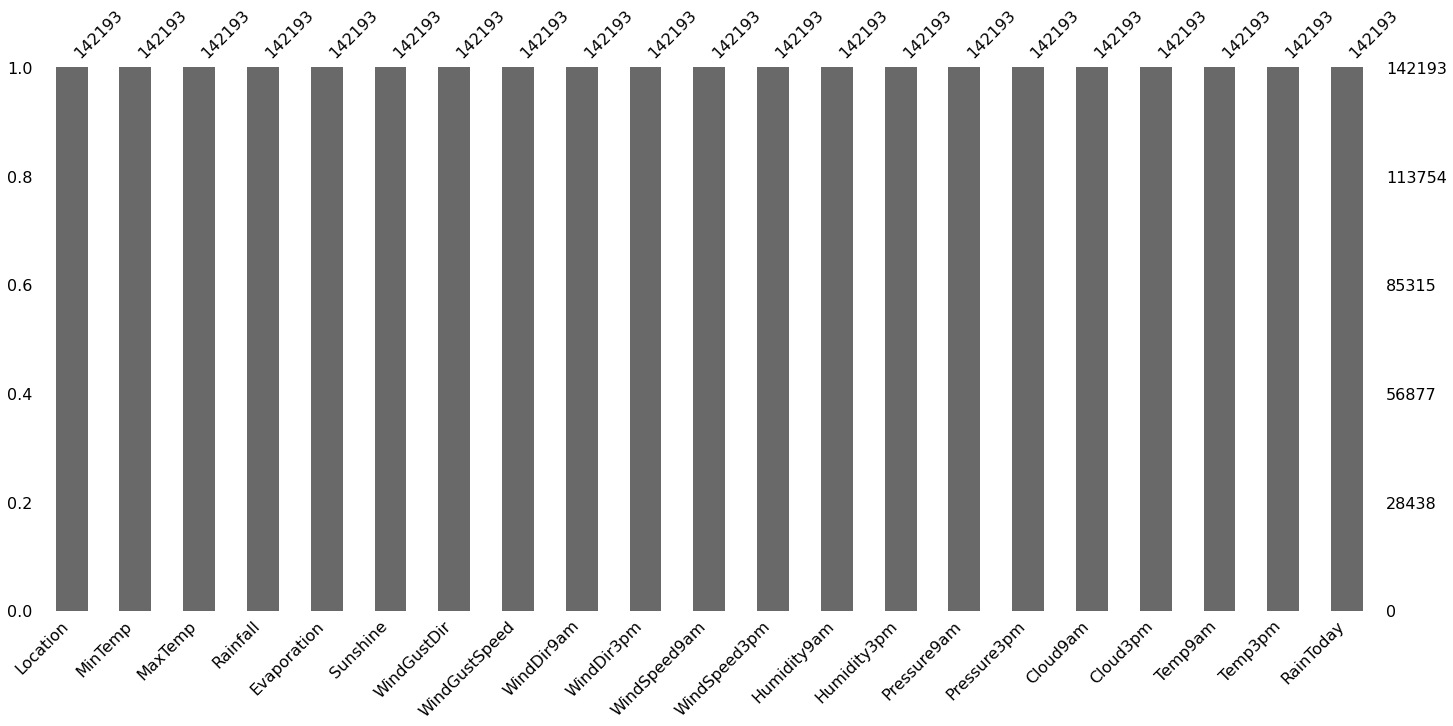

In [14]:
import missingno as msno
msno.bar(df)
plt.show()


# 3.Again Data Cleaning And Analysing

In [15]:
df.drop(columns=['Sunshine', 'Evaporation'], inplace=True)

In [16]:
df.dtypes

Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
dtype: object

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142193 entries, 0 to 42676
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       142193 non-null  object 
 1   MinTemp        142193 non-null  float64
 2   MaxTemp        142193 non-null  float64
 3   Rainfall       142193 non-null  float64
 4   WindGustDir    142193 non-null  object 
 5   WindGustSpeed  142193 non-null  float64
 6   WindDir9am     142193 non-null  object 
 7   WindDir3pm     142193 non-null  object 
 8   WindSpeed9am   142193 non-null  float64
 9   WindSpeed3pm   142193 non-null  float64
 10  Humidity9am    142193 non-null  float64
 11  Humidity3pm    142193 non-null  float64
 12  Pressure9am    142193 non-null  float64
 13  Pressure3pm    142193 non-null  float64
 14  Cloud9am       142193 non-null  float64
 15  Cloud3pm       142193 non-null  float64
 16  Temp9am        142193 non-null  float64
 17  Temp3pm        142193 non-null

# 4.Handling Categorical Data And Making New Dataframe

**Visualising Categorical Data**

In [18]:
cat_cols = [col for col in df.columns if df[col].dtype == 'O']
cat_cols

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [19]:
cat_df = df[cat_cols]
cat_df.head()

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday
0,Albury,W,W,WNW,No
1,Albury,WNW,NNW,WSW,No
2,Albury,W,ENE,NW,No
3,Albury,WNW,W,W,No
4,Albury,W,SSE,W,No


In [20]:
for col in cat_df.columns:
    print(f"{col}: \n{cat_df[col].unique()}\n")

Location: 
['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'Newcastle'
 'NorahHead' 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'MelbourneAirport' 'Melbourne'
 'Mildura' 'Nhil' 'Portland' 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns'
 'GoldCoast' 'Townsville' 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera'
 'Albany' 'Witchcliffe' 'PearceRAAF' 'PerthAirport' 'Perth' 'SalmonGums'
 'Walpole' 'Hobart' 'Launceston' 'AliceSprings' 'Darwin' 'Katherine'
 'Uluru']

WindGustDir: 
['W' 'WNW' 'N' 'NNE' 'SW' 'ENE' 'SSE' 'NE' 'WSW' 'NNW' 'S' 'ESE' 0 'NW'
 'E' 'SSW' 'SE']

WindDir9am: 
['W' 'NNW' 'ENE' 'SSE' 'S' 'NE' 0 'SSW' 'N' 'WSW' 'SE' 'ESE' 'E' 'NW'
 'NNE' 'SW' 'WNW']

WindDir3pm: 
['WNW' 'WSW' 'NW' 'W' 'SSE' 'ESE' 'ENE' 'SSW' 'E' 'SW' 'NNW' 'N' 'S' 0
 'SE' 'NNE' 'NE']

RainToday: 
['No' 'Yes' 0]



**Convert values form categorical to numrical values and making our new dataset**

In [21]:

cat_df['Location'] = cat_df['Location'].map({'Albury': 0 ,'BadgerysCreek': 1 ,'Cobar': 2, 'CoffsHarbour': 3, 'Moree' : 4, 'Newcastle': 5,
 'NorahHead' : 6, 'NorfolkIsland':7, 'Penrith':8, 'Richmond':9, 'Sydney':10, 'SydneyAirport': 11,
 'WaggaWagga' : 12, 'Williamtown': 13, 'Wollongong': 14, 'Canberra': 15, 'Tuggeranong': 16,
 'MountGinini': 17, 'Ballarat': 18, 'Bendigo': 19, 'Sale': 20, 'MelbourneAirport':21, 'Melbourne':22,
 'Mildura':23, 'Nhil':24, 'Portland':25, 'Watsonia':26, 'Dartmoor':27, 'Brisbane':28, 'Cairns':29,
 'GoldCoast':30, 'Townsville':31, 'Adelaide':32, 'MountGambier':33, 'Nuriootpa':34, 'Woomera':35,
 'Albany':36, 'Witchcliffe':37, 'PearceRAAF':38, 'PerthAirport':39, 'Perth':40, 'SalmonGums':41,
 'Walpole':42, 'Hobart':43, 'Launceston':44, 'AliceSprings':45, 'Darwin':46, 'Katherine':47,
 'Uluru':48})

cat_df['WindGustDir'] = cat_df['WindGustDir'].map({'W':0, 'WNW':1, 'N':2, 'NNE':3, 'SW':4, 'ENE':5, 'SSE':6, 'NE':7, 'WSW':8, 'NNW':9, 'S':10, 'ESE':11, 0:12 ,'NW':13,
 'E':14, 'SSW':15 ,'SE':16})

cat_df['WindDir9am'] = cat_df['WindDir9am'].map({'W':0, 'NNW':1, 'ENE':2, 'SSE':3, 'S':4, 'NE':5, 0:6,'SSW':7, 'N':8, 'WSW':9, 'SE':10, 'ESE':11, 'E':12, 'NW':13,
 'NNE':14, 'SW':15, 'WNW':16})

cat_df['WindDir3pm'] = cat_df['WindDir3pm'].map({'WNW': 0, 'WSW': 1, 'NW':2, 'W':3, 'SSE':4, 'ESE':5, 'ENE':6, 'SSW':7, 'E':8, 'SW':9, 'NNW':10, 'N':11, 'S':12, 0:13,
 'SE':14, 'NNE':15, 'NE':16})
                                                                       

cat_df['RainToday'] = cat_df['RainToday'].map({'No':0, 'Yes':1, 0:2})
                                                                   


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == "__main__":
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == "":
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

**Making New Dataframe**

In [22]:
cat_df.head()
cat_df_tr= cat_df
cat_df_tr.head()
cat_df_tr

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday
0,0,0,0,0,0
1,0,1,1,1,0
2,0,0,2,2,0
3,0,1,0,3,0
4,0,0,3,3,0
...,...,...,...,...,...
42672,48,14,10,8,0
42673,48,16,10,4,0
42674,48,10,4,8,0
42675,48,14,11,8,0


In [23]:
num_df = df.drop(columns = cat_cols, axis = 1)
num_df

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,0.0,16.9,21.8
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,0.0,0.0,17.2,24.3
2,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7
3,14.6,29.7,0.2,56.0,19.0,24.0,55.0,23.0,1009.2,1005.4,0.0,0.0,20.6,28.9
4,7.7,26.7,0.0,35.0,6.0,17.0,48.0,19.0,1013.4,1010.1,0.0,0.0,16.3,25.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42672,2.4,19.1,0.0,33.0,17.0,17.0,59.0,24.0,1030.0,1026.2,0.0,0.0,8.0,18.8
42673,2.3,21.4,0.0,22.0,11.0,7.0,60.0,28.0,1026.9,1022.8,0.0,0.0,8.9,20.3
42674,2.6,22.5,0.0,19.0,9.0,7.0,59.0,24.0,1025.0,1021.4,0.0,0.0,8.8,22.1
42675,7.4,20.6,0.0,35.0,15.0,17.0,63.0,33.0,1027.2,1023.3,0.0,0.0,11.0,20.3


In [24]:
df=cat_df_tr.add(num_df,fill_value=0)
df

,Cloud3pm,Cloud9am,Humidity3pm,Humidity9am,Location,MaxTemp,MinTemp,Pressure3pm,Pressure9am,RainToday,Rainfall,Temp3pm,Temp9am,WindDir3pm,WindDir9am,WindGustDir,WindGustSpeed,WindSpeed3pm,WindSpeed9am
0,0.0,8.0,22.0,71.0,0.0,22.9,13.4,1007.1,1007.7,0.0,0.6,21.8,16.9,0.0,0.0,0.0,44.0,24.0,20.0
1,0.0,0.0,25.0,44.0,0.0,25.1,7.4,1007.8,1010.6,0.0,0.0,24.3,17.2,1.0,1.0,1.0,44.0,22.0,4.0
2,8.0,7.0,33.0,82.0,0.0,32.3,17.5,1006.0,1010.8,0.0,1.0,29.7,17.8,2.0,2.0,0.0,41.0,20.0,7.0
3,0.0,0.0,23.0,55.0,0.0,29.7,14.6,1005.4,1009.2,0.0,0.2,28.9,20.6,3.0,0.0,1.0,56.0,24.0,19.0
4,0.0,0.0,19.0,48.0,0.0,26.7,7.7,1010.1,1013.4,0.0,0.0,25.5,16.3,3.0,3.0,0.0,35.0,17.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42672,0.0,0.0,24.0,59.0,48.0,19.1,2.4,1026.2,1030.0,0.0,0.0,18.8,8.0,8.0,10.0,14.0,33.0,17.0,17.0
42673,0.0,0.0,28.0,60.0,48.0,21.4,2.3,1022.8,1026.9,0.0,0.0,20.3,8.9,4.0,10.0,16.0,22.0,7.0,11.0
42674,0.0,0.0,24.0,59.0,48.0,22.5,2.6,1021.4,1025.0,0.0,0.0,22.1,8.8,8.0,4.0,10.0,19.0,7.0,9.0
42675,0.0,0.0,33.0,63.0,48.0,20.6,7.4,1023.3,1027.2,0.0,0.0,20.3,11.0,8.0,11.0,14.0,35.0,17.0,15.0


In [25]:
train = df.iloc[:99516,:]
new_train = pd.concat([train, y], axis=1)
test = df.iloc[99516:, :]

In [26]:
new_train

,Cloud3pm,Cloud9am,Humidity3pm,Humidity9am,Location,MaxTemp,MinTemp,Pressure3pm,Pressure9am,RainToday,Rainfall,Temp3pm,Temp9am,WindDir3pm,WindDir9am,WindGustDir,WindGustSpeed,WindSpeed3pm,WindSpeed9am,RainTomorrow
0,0.0,8.0,22.0,71.0,0.0,22.9,13.4,1007.1,1007.7,0.0,0.6,21.8,16.9,0.0,0.0,0.0,44.0,24.0,20.0,0
1,0.0,0.0,25.0,44.0,0.0,25.1,7.4,1007.8,1010.6,0.0,0.0,24.3,17.2,1.0,1.0,1.0,44.0,22.0,4.0,0
2,8.0,7.0,33.0,82.0,0.0,32.3,17.5,1006.0,1010.8,0.0,1.0,29.7,17.8,2.0,2.0,0.0,41.0,20.0,7.0,0
3,0.0,0.0,23.0,55.0,0.0,29.7,14.6,1005.4,1009.2,0.0,0.2,28.9,20.6,3.0,0.0,1.0,56.0,24.0,19.0,0
4,0.0,0.0,19.0,48.0,0.0,26.7,7.7,1010.1,1013.4,0.0,0.0,25.5,16.3,3.0,3.0,0.0,35.0,17.0,6.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99511,7.0,0.0,32.0,56.0,48.0,20.7,8.0,1024.3,1028.1,0.0,0.0,20.0,11.6,8.0,10.0,11.0,41.0,26.0,19.0,0
99512,0.0,0.0,27.0,59.0,48.0,21.8,3.5,1021.2,1024.7,0.0,0.0,20.9,9.4,8.0,11.0,14.0,31.0,13.0,15.0,0
99513,0.0,0.0,24.0,51.0,48.0,23.4,2.8,1020.3,1024.6,0.0,0.0,22.4,10.1,6.0,10.0,14.0,31.0,11.0,13.0,0
99514,0.0,0.0,21.0,56.0,48.0,25.3,3.6,1019.1,1023.5,0.0,0.0,24.5,10.9,11.0,10.0,9.0,22.0,9.0,13.0,0


In [27]:
test

,Cloud3pm,Cloud9am,Humidity3pm,Humidity9am,Location,MaxTemp,MinTemp,Pressure3pm,Pressure9am,RainToday,Rainfall,Temp3pm,Temp9am,WindDir3pm,WindDir9am,WindGustDir,WindGustSpeed,WindSpeed3pm,WindSpeed9am
0,2.0,0.0,30.0,38.0,0.0,25.7,12.9,1008.7,1007.6,0.0,0.0,23.2,21.0,1.0,0.0,8.0,46.0,26.0,19.0
1,0.0,0.0,16.0,45.0,0.0,28.0,9.2,1012.8,1017.6,0.0,0.0,26.5,18.1,8.0,10.0,7.0,24.0,9.0,11.0
2,0.0,1.0,19.0,49.0,0.0,25.0,14.3,1008.2,1009.6,0.0,0.0,24.6,18.1,3.0,15.0,0.0,50.0,24.0,20.0
3,0.0,0.0,9.0,42.0,0.0,31.9,9.7,1003.6,1008.9,0.0,0.0,30.2,18.3,2.0,10.0,9.0,80.0,28.0,7.0
4,8.0,8.0,93.0,76.0,0.0,18.6,15.9,993.0,994.3,1.0,15.6,15.8,17.4,10.0,1.0,0.0,61.0,28.0,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42672,0.0,0.0,24.0,59.0,48.0,19.1,2.4,1026.2,1030.0,0.0,0.0,18.8,8.0,8.0,10.0,14.0,33.0,17.0,17.0
42673,0.0,0.0,28.0,60.0,48.0,21.4,2.3,1022.8,1026.9,0.0,0.0,20.3,8.9,4.0,10.0,16.0,22.0,7.0,11.0
42674,0.0,0.0,24.0,59.0,48.0,22.5,2.6,1021.4,1025.0,0.0,0.0,22.1,8.8,8.0,4.0,10.0,19.0,7.0,9.0
42675,0.0,0.0,33.0,63.0,48.0,20.6,7.4,1023.3,1027.2,0.0,0.0,20.3,11.0,8.0,11.0,14.0,35.0,17.0,15.0


# 5.Feature Selection And Visualisation

**Correlation among features**

<AxesSubplot:>

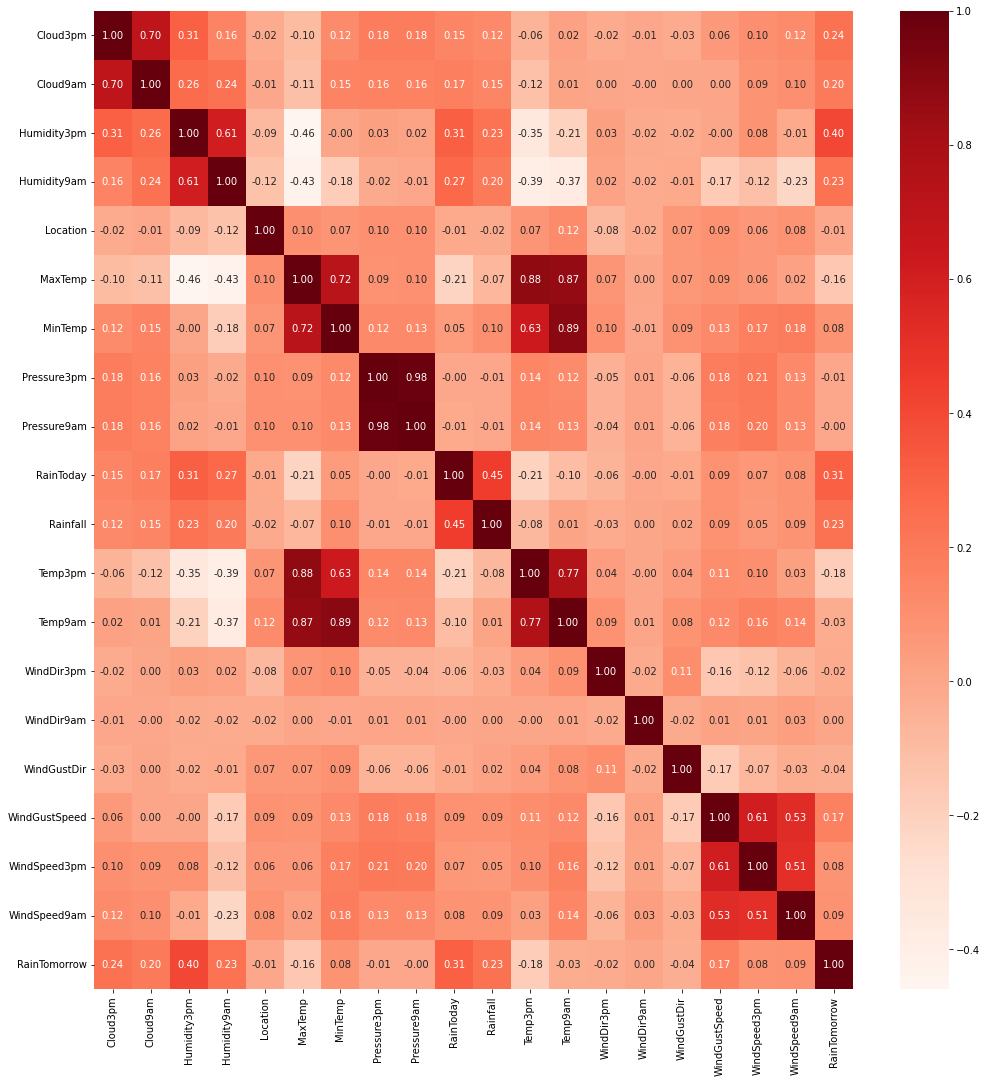

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(17,18))
cor = new_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds,fmt='.2f')

**Ploting the features by using various method**

<AxesSubplot:xlabel='MaxTemp', ylabel='Count'>

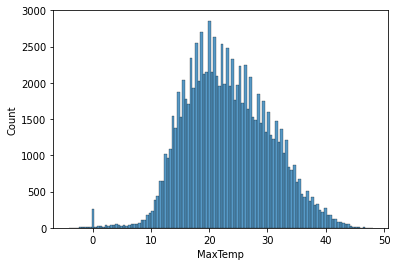

In [29]:
sns.histplot(new_train['MaxTemp'])

<AxesSubplot:xlabel='MinTemp', ylabel='Count'>

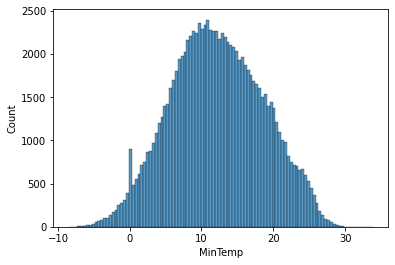

In [30]:
sns.histplot(new_train['MinTemp'])

<AxesSubplot:xlabel='Pressure3pm', ylabel='Count'>

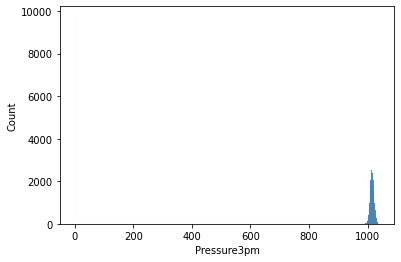

In [31]:
sns.histplot(new_train['Pressure3pm'])

<AxesSubplot:xlabel='Pressure9am', ylabel='Count'>

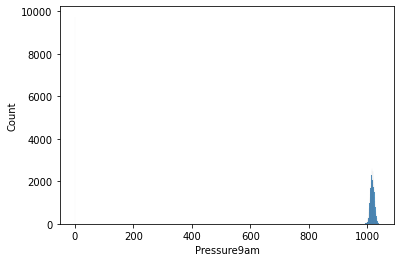

In [32]:
sns.histplot(new_train['Pressure9am'])

<AxesSubplot:xlabel='RainToday', ylabel='Count'>

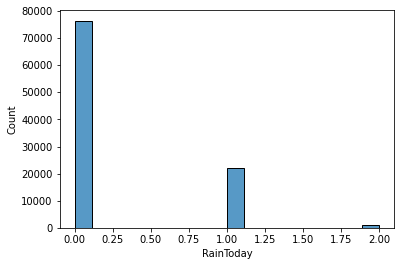

In [33]:
sns.histplot(new_train['RainToday'])

<AxesSubplot:xlabel='Rainfall'>

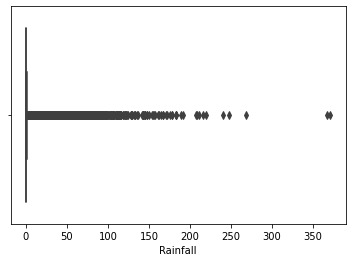

In [34]:
sns.boxplot(x=new_train['Rainfall'])

<AxesSubplot:xlabel='Temp3pm', ylabel='Count'>

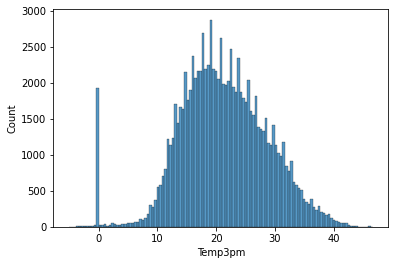

In [35]:
sns.histplot(new_train['Temp3pm'])

<AxesSubplot:xlabel='Temp9am', ylabel='Count'>

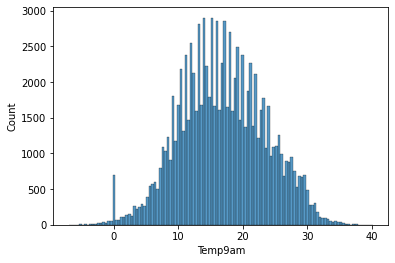

In [36]:
sns.histplot(new_train['Temp9am'])

<AxesSubplot:xlabel='WindDir3pm', ylabel='Count'>

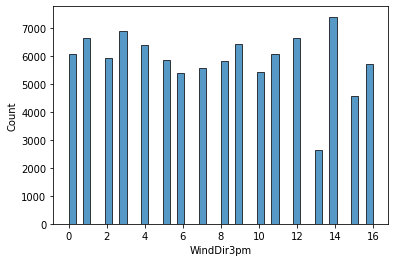

In [37]:
sns.histplot(new_train['WindDir3pm'])

<AxesSubplot:xlabel='WindDir9am', ylabel='Count'>

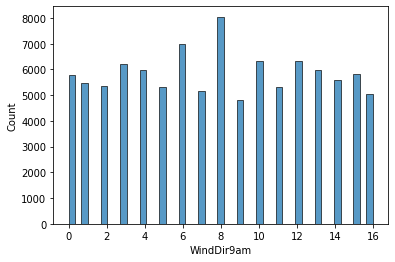

In [38]:
sns.histplot(new_train['WindDir9am'])

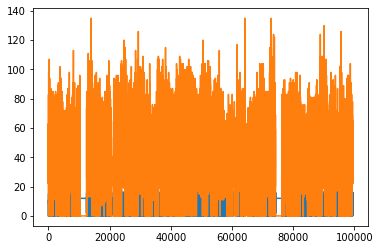

In [39]:
plt.plot(new_train['WindGustDir'])
plt.plot(new_train['WindGustSpeed'])

<AxesSubplot:xlabel='Humidity9am', ylabel='Count'>

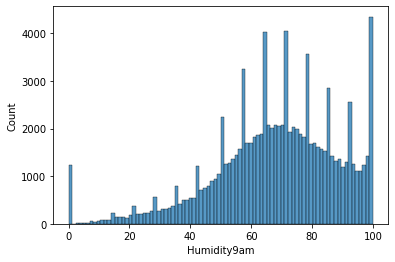

In [40]:
sns.histplot(new_train['Humidity9am'])

<AxesSubplot:xlabel='Humidity3pm', ylabel='Count'>

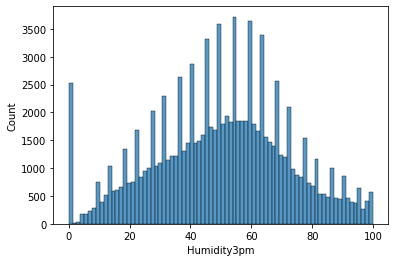

In [41]:
sns.histplot(new_train['Humidity3pm'])

<AxesSubplot:xlabel='Cloud9am', ylabel='Count'>

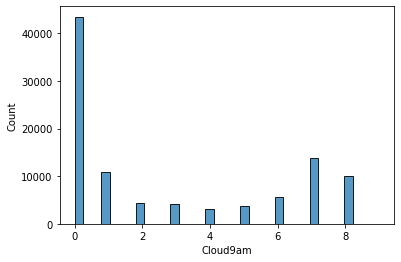

In [42]:
sns.histplot(x=new_train['Cloud9am'])

<AxesSubplot:xlabel='Cloud3pm'>

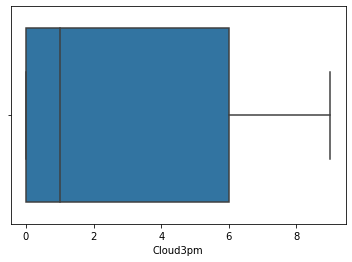

In [43]:
sns.boxplot(x=new_train['Cloud3pm'])

<AxesSubplot:xlabel='RainToday', ylabel='count'>

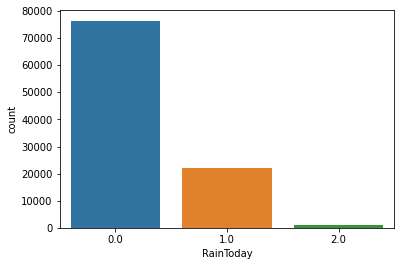

In [44]:
sns.countplot(x=new_train['RainToday'])

<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

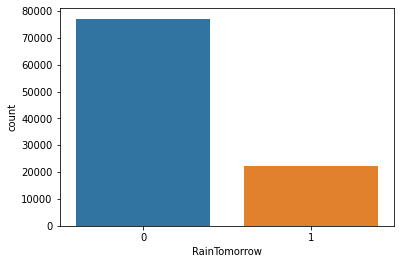

In [45]:
sns.countplot(x=new_train['RainTomorrow'])

In [46]:
new_train['RainTomorrow'].value_counts()

0    77157
1    22359
Name: RainTomorrow, dtype: int64

<AxesSubplot:xlabel='RainTomorrow', ylabel='Count'>

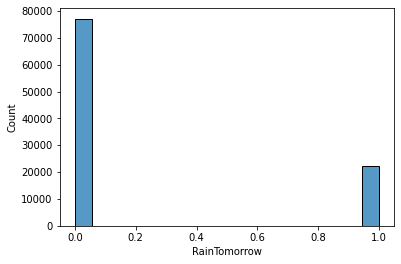

In [47]:
sns.histplot(x=new_train['RainTomorrow'])

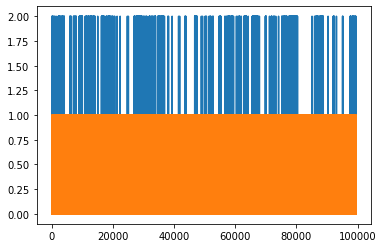

In [48]:
plt.plot(new_train['RainToday'])
plt.plot(new_train['RainTomorrow'])

# 6.Balancing Dataset/Handling Skewed Data

In [49]:
df_majority_0 = new_train[(new_train['RainTomorrow']==0)] 
df_minority_1 = new_train[(new_train['RainTomorrow']==1)] 

df_minority_upsampled = resample(df_minority_1, 
                                 replace=True,    
                                 n_samples= 77157, 
                                 random_state=42) 

df_upsampled = pd.concat([df_minority_upsampled, df_majority_0])

In [50]:
df_majority_0

,Cloud3pm,Cloud9am,Humidity3pm,Humidity9am,Location,MaxTemp,MinTemp,Pressure3pm,Pressure9am,RainToday,Rainfall,Temp3pm,Temp9am,WindDir3pm,WindDir9am,WindGustDir,WindGustSpeed,WindSpeed3pm,WindSpeed9am,RainTomorrow
0,0.0,8.0,22.0,71.0,0.0,22.9,13.4,1007.1,1007.7,0.0,0.6,21.8,16.9,0.0,0.0,0.0,44.0,24.0,20.0,0
1,0.0,0.0,25.0,44.0,0.0,25.1,7.4,1007.8,1010.6,0.0,0.0,24.3,17.2,1.0,1.0,1.0,44.0,22.0,4.0,0
2,8.0,7.0,33.0,82.0,0.0,32.3,17.5,1006.0,1010.8,0.0,1.0,29.7,17.8,2.0,2.0,0.0,41.0,20.0,7.0,0
3,0.0,0.0,23.0,55.0,0.0,29.7,14.6,1005.4,1009.2,0.0,0.2,28.9,20.6,3.0,0.0,1.0,56.0,24.0,19.0,0
4,0.0,0.0,19.0,48.0,0.0,26.7,7.7,1010.1,1013.4,0.0,0.0,25.5,16.3,3.0,3.0,0.0,35.0,17.0,6.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99511,7.0,0.0,32.0,56.0,48.0,20.7,8.0,1024.3,1028.1,0.0,0.0,20.0,11.6,8.0,10.0,11.0,41.0,26.0,19.0,0
99512,0.0,0.0,27.0,59.0,48.0,21.8,3.5,1021.2,1024.7,0.0,0.0,20.9,9.4,8.0,11.0,14.0,31.0,13.0,15.0,0
99513,0.0,0.0,24.0,51.0,48.0,23.4,2.8,1020.3,1024.6,0.0,0.0,22.4,10.1,6.0,10.0,14.0,31.0,11.0,13.0,0
99514,0.0,0.0,21.0,56.0,48.0,25.3,3.6,1019.1,1023.5,0.0,0.0,24.5,10.9,11.0,10.0,9.0,22.0,9.0,13.0,0


In [51]:
df_upsampled

,Cloud3pm,Cloud9am,Humidity3pm,Humidity9am,Location,MaxTemp,MinTemp,Pressure3pm,Pressure9am,RainToday,Rainfall,Temp3pm,Temp9am,WindDir3pm,WindDir9am,WindGustDir,WindGustSpeed,WindSpeed3pm,WindSpeed9am,RainTomorrow
68476,7.0,7.0,62.0,94.0,33.0,18.4,10.6,1002.5,1001.3,1.0,3.6,15.9,14.2,3.0,1.0,1.0,54.0,24.0,17.0,1
4321,8.0,6.0,90.0,61.0,2.0,17.4,12.2,1010.2,1012.0,0.0,0.0,14.8,16.5,2.0,8.0,13.0,43.0,11.0,13.0,1
23977,8.0,8.0,85.0,91.0,11.0,17.9,16.4,1011.1,1012.7,1.0,1.2,17.0,16.4,4.0,7.0,15.0,52.0,17.0,19.0,1
95503,6.0,3.0,56.0,77.0,46.0,32.4,25.7,1010.2,1013.3,0.0,0.0,31.3,28.1,2.0,14.0,5.0,37.0,17.0,19.0,1
53272,7.0,8.0,87.0,99.0,26.0,15.6,7.8,1008.3,1009.3,1.0,1.6,11.5,9.0,11.0,6.0,2.0,31.0,13.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99511,7.0,0.0,32.0,56.0,48.0,20.7,8.0,1024.3,1028.1,0.0,0.0,20.0,11.6,8.0,10.0,11.0,41.0,26.0,19.0,0
99512,0.0,0.0,27.0,59.0,48.0,21.8,3.5,1021.2,1024.7,0.0,0.0,20.9,9.4,8.0,11.0,14.0,31.0,13.0,15.0,0
99513,0.0,0.0,24.0,51.0,48.0,23.4,2.8,1020.3,1024.6,0.0,0.0,22.4,10.1,6.0,10.0,14.0,31.0,11.0,13.0,0
99514,0.0,0.0,21.0,56.0,48.0,25.3,3.6,1019.1,1023.5,0.0,0.0,24.5,10.9,11.0,10.0,9.0,22.0,9.0,13.0,0


**Correlation among features after balancing**

<AxesSubplot:>

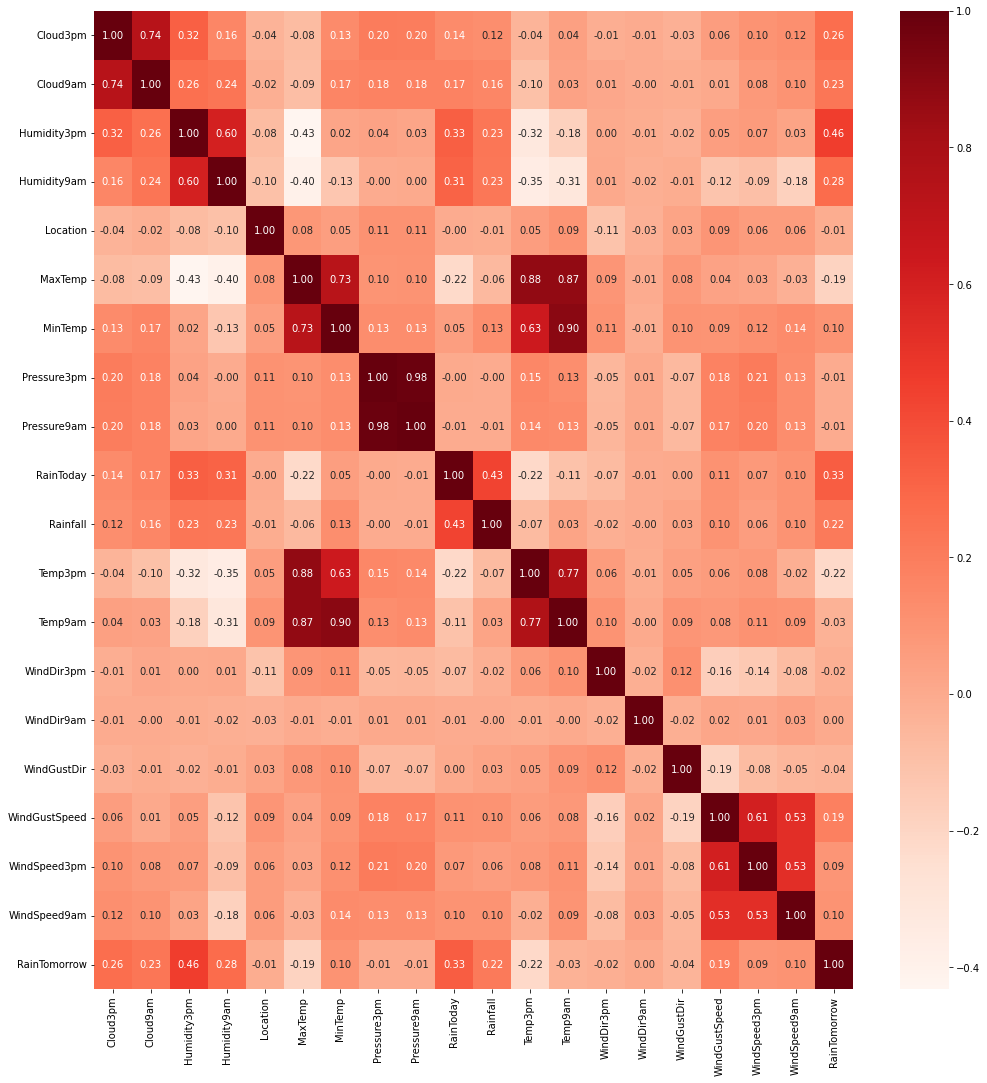

In [52]:
plt.figure(figsize=(17,18))
cor = df_upsampled.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds,fmt='.2f')

<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

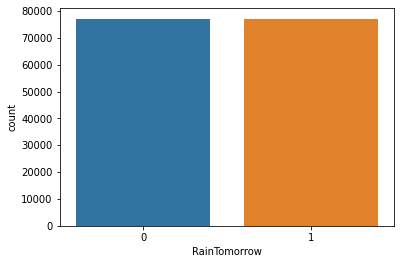

In [53]:
sns.countplot(x=df_upsampled['RainTomorrow'])

# 7.Splitting Data For Modeling & Visualisation Their Shape

In [54]:
X = df_upsampled.drop(columns='RainTomorrow')
y = df_upsampled['RainTomorrow']

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.90, shuffle= True ,random_state=44)

In [56]:
X_train.shape

(138882, 19)

In [57]:
X_test.shape

(15432, 19)

# 8.Standardization

In [58]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

# MODEL ARCHITECTURE

In [59]:
import keras
from keras.layers import Dense
from keras.models import Sequential

model  = Sequential()
model.add(Dense(256, activation = 'relu', input_shape = (19, )))
model.add(Dense(90, activation = 'sigmoid'))
model.add(Dense(88, activation = 'sigmoid'))
model.add(Dense(45, activation = 'sigmoid'))
model.add(Dense(2, activation = 'sigmoid'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model_history = model.fit(X_train, y_train, validation_data = (X_test, y_test),
                          epochs = 100)

Epoch 1/100
4341/4341 [==============================] - 15s 3ms/step - loss: 0.5064 - accuracy: 0.7670 - val_loss: 0.4759 - val_accuracy: 0.7779
Epoch 2/100
4341/4341 [==============================] - 14s 3ms/step - loss: 0.4678 - accuracy: 0.7798 - val_loss: 0.4627 - val_accuracy: 0.7816
Epoch 3/100
4341/4341 [==============================] - 14s 3ms/step - loss: 0.4560 - accuracy: 0.7855 - val_loss: 0.4526 - val_accuracy: 0.7879
Epoch 4/100
4341/4341 [==============================] - 15s 4ms/step - loss: 0.4474 - accuracy: 0.7899 - val_loss: 0.4498 - val_accuracy: 0.7880
Epoch 5/100
4341/4341 [==============================] - 14s 3ms/step - loss: 0.4404 - accuracy: 0.7934 - val_loss: 0.4426 - val_accuracy: 0.7888
Epoch 6/100
4341/4341 [==============================] - 15s 3ms/step - loss: 0.4331 - accuracy: 0.7977 - val_loss: 0.4374 - val_accuracy: 0.7921
Epoch 7/100
4341/4341 [==============================] - 14s 3ms/step - loss: 0.4263 - accuracy: 0.8011 - val_loss: 0.4315 -

In [60]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               5120      
_________________________________________________________________
dense_1 (Dense)              (None, 90)                23130     
_________________________________________________________________
dense_2 (Dense)              (None, 88)                8008      
_________________________________________________________________
dense_3 (Dense)              (None, 45)                4005      
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 92        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 3         
Total params: 40,358
Trainable params: 40,358
Non-trainable params: 0
____________________________________________________

# MODEL PREDICTION AND IT'S PERFORMANCE METRICS

In [61]:
y_pred = model.predict(X_test)

In [62]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.6312097025933154

In [63]:
acc_ann = model.evaluate(X_test, y_test)[1]

print(f'Accuracy of model is {acc_ann}')

483/483 [==============================] - 1s 2ms/step - loss: 0.3596 - accuracy: 0.8903
Accuracy of model is 0.8902928829193115


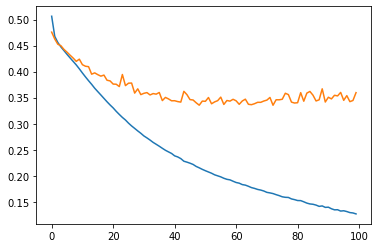

In [64]:
import matplotlib.pyplot as plt
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])

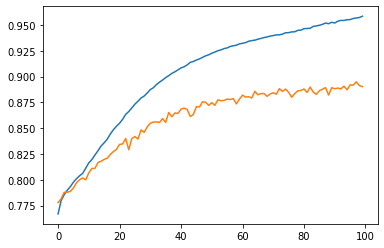

In [66]:
import matplotlib.pyplot as plt
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])

# PREPARING ANOTHER MODEL TO SEE THE OTHER PERFORMANCE METRICS & A SMALL COMPARISION WITH OUR ANN MODEL'S PERFORMANCE

# Preparing ROC-CURVE With Logistic Regrassion

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2, shuffle= True ,random_state=44)
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(max_iter=1000)

In [69]:
y_scores = model.predict_proba(X_test)[:,1]

In [70]:
y_scores

array([0.97995231, 0.30509468, 0.86055547, ..., 0.87937234, 0.92720749,
       0.23119361])

In [71]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(y_test,y_scores)

In [72]:
thresholds

array([1.99980960e+00, 9.99809597e-01, 9.98249472e-01, ...,
       1.25444452e-02, 1.24885217e-02, 1.77397062e-03])

In [73]:
def plot_roc(y_test,scores):
    fpr,tpr,thresholds=roc_curve(y_test,y_scores)
    roc_auc=auc(fpr,tpr)
    print('ROC AUC=%0.2f'%roc_auc)
    plt.plot(fpr,tpr,label='ROC AUC=%0.2f'%roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'b--')
    plt.xlim([0,1])
    plt.ylim([0,1.05])
    plt.xlabel('Flase Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()

ROC AUC=0.82


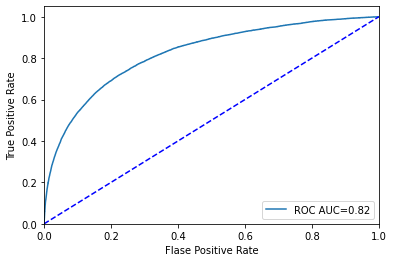

In [74]:
plot_roc(y_test,y_scores)

# Preparing A Classifier Model To See Other Performance Metrics 

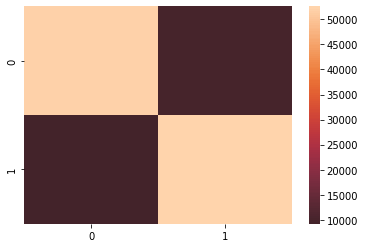

Confusion Matrix is
 [[51835  9821]
 [ 9195 52601]]


In [75]:
from sklearn.ensemble import RandomForestClassifier
RandomForestClassifierModel = RandomForestClassifier(criterion = 'gini', max_depth=17, n_estimators=100, random_state=44)
RandomForestClassifierModel.fit(X_train, y_train)
y_pred_rf = RandomForestClassifierModel.predict(X_test)
Conf_rf = confusion_matrix(y_test, y_pred_rf)

sns.heatmap(Conf_rf, center=True)
plt.show()

print('Confusion Matrix is\n', Conf_rf)

In [76]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score 

acc_rf = accuracy_score(y_test, y_pred_rf)
acc_rf

0.8459644234196286

In [77]:
prec_rf = precision_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)

In [78]:
prec_rf

0.8426676492262344

In [79]:
f1_rf

0.8469142958347421

In [80]:
recall_rf

0.8512039614214513